In [15]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
import gin
from DataUtils.Getdata import GetDataSets
from DataUtils.Getdata import ModuleTest
from Models.LineairModelCollection import CNN
import Models.LineairModelCollection

print(torch.version.cuda)
gin.enter_interactive_mode()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
11.3


In [16]:
gin.parse_config_file("config.gin")

In [20]:

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"

In [21]:
batch_size=64
train_dataloader,test_dataloader = GetDataSets(batch_size, device)

In [22]:
train_dataloader.dataset
type(train_dataloader.dataset)

torchvision.datasets.mnist.FashionMNIST

In [30]:
globaLlr = 0.2
globalEpochs = 20
globalsteps = 5

In [40]:
from Models.SeNetModelCollection import SeREs 
model = SeREs(kernel=3,units=28).to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()
 
RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           )

2022-05-21 11:57:25.924 | INFO     | Training.trainer:RunTrainer:71 - Logging to ..\trained_models\20220521-1157


SeREs(
  (Squeeze): Linear(in_features=28, out_features=1, bias=True)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
  (exite): Linear(in_features=1, out_features=28, bias=True)
  (sigmoid): Sigmoid()
)
..\trained_models


RuntimeError: only batches of spatial targets supported (3D tensors) but got targets of size: : [64]
  In call to configurable 'RunTrainer' (<function RunTrainer at 0x000001846934FBE0>)

In [34]:
X, y = next(iter(train_dataloader))
X.shape, y.shape


(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [25]:
img = X[0]
img.shape

torch.Size([1, 28, 28])

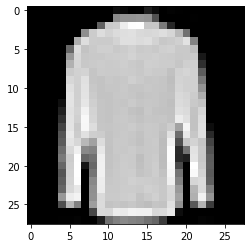

In [26]:
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")

In [48]:

sq_units = int(784 / 64) 
fSqueeze = nn.AdaptiveAvgPool2d(3)
fflat = nn.Flatten()
fSqueeze = nn.Linear(784, 64)
frelu = nn.ReLU()
fexite = nn.Linear(64, 784)
fsigmoid = nn.Sigmoid()
#       

x = X[0]
skip = x
y = fSqueeze(x)
y = fflat(x)
#y = fSqueeze(x)
#y = frelu(x)
#y.shape
#y = fexite(x)
#y = fsigmoid(x)
#y = x[..., None, None]
y.shape

torch.Size([1, 784])

In [28]:
globaLlr = 0.02
globalEpochs = 50
globalsteps = 5